In [17]:
import nltk
nltk.download('punkt')
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/hthere215/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Step 1: Load the dataset
def load_data(directory):
    data = []
    labels = []
    for label in ['pos', 'neg']:
        path = os.path.join(directory, label)
        for filename in os.listdir(path):
            with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
                data.append(file.read())
                labels.append(1 if label == 'pos' else 0)
    return data, labels

# Paths to train and test directories
train_path = '/Users/hthere215/Desktop/cs178_project/aclImdb/train'
test_path = '/Users/hthere215/Desktop/cs178_project/aclImdb/test'

# Load the data
train_data, train_labels = load_data(train_path)
test_data, test_labels = load_data(test_path)

print(len(train_data))

25000


In [30]:
# Step 2: Text Preprocessing (Remove stop words, clean data, tokenize)
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)
    
# Apply preprocessing to the data and include labels
train_data_preprocessed_with_labels = [(preprocess_text(text), label) for text, label in zip(train_data, train_labels)]
test_data_preprocessed_with_labels = [(preprocess_text(text), label) for text, label in zip(test_data, test_labels)]

# Shuffle the data
random.shuffle(train_data_preprocessed_with_labels)
random.shuffle(test_data_preprocessed_with_labels)

#Trim down the data for faster processing
train_data_preprocessed_with_labels = train_data_preprocessed_with_labels[:6000]

In [99]:
import matplotlib.pyplot as plt
from collections import Counter

# Vectorize Text Data
vectorizer = CountVectorizer(stop_words='english')
X_train1 = vectorizer.fit_transform([text for text, _ in train_data_preprocessed_with_labels])
X_test1 = vectorizer.transform([text for text, _ in test_data_preprocessed_with_labels])

# Labels
y_train1 = [label for _, label in train_data_preprocessed_with_labels]
y_test1 = [label for _, label in test_data_preprocessed_with_labels]


# Get the shape of X_train2
num_train_samples, num_features = X_train1.shape
print(f"Number of training samples: {num_train_samples}")
print(f"Number of features: {num_features}")

# Get the shape of X_test2
num_test_samples, _ = X_test1.shape
print(f"Number of test samples: {num_test_samples}")

# Get the vocabulary dictionary
vocabulary = vectorizer.vocabulary_
print(X_train1.shape)
print(X_test1.shape)

Number of training samples: 6000
Number of features: 60164
Number of test samples: 25000
(6000, 60164)
(25000, 60164)


In [57]:
# Set the learning rate
learning_rate = 0.01

# Create and train the model
clf = MLPClassifier(hidden_layer_sizes=(80), max_iter=100, alpha=0.01, learning_rate_init=learning_rate, random_state=42)
clf.fit(X_train1, y_train1)

# Evaluate the model
test_predictions1 = clf.predict(X_test1)
test_accuracy1 = accuracy_score(y_test1, test_predictions1)

# Print the accuracy
print(f'Test Accuracy: {test_accuracy1}')

Test Accuracy: 0.83944


In [40]:
# Example sentence
new_sentence = "This is worst movie!"
# Preprocess the new sentence
preprocessed_sentence = preprocess_text(new_sentence)
# Vectorize the preprocessed sentence using the same vectorizer
new_sentence_tfidf = vectorizer.transform([preprocessed_sentence])
# Make predictions
prediction = clf.predict(new_sentence_tfidf)

# Print the predicted sentiment
if prediction[0] == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")

Negative sentiment


In [38]:
# Vectorize Text Data with 2-grams
vectorizer2 = CountVectorizer(ngram_range=(2, 2))  # This specifies 2-grams
X_train2 = vectorizer2.fit_transform([text for text, _ in train_data_preprocessed_with_labels])
X_test2 = vectorizer2.transform([text for text, _ in test_data_preprocessed_with_labels])

# Labels
y_train2 = [label for _, label in train_data_preprocessed_with_labels]
y_test2 = [label for _, label in test_data_preprocessed_with_labels]

# Get the shape of X_train2
num_train_samples, num_features = X_train2.shape
print(f"Number of training samples: {num_train_samples}")
print(f"Number of features: {num_features}")

# Get the shape of X_test2
num_test_samples, _ = X_test2.shape
print(f"Number of test samples: {num_test_samples}")


Number of training samples: 6000
Number of features: 535388
Number of test samples: 25000


In [41]:
# Set the learning rate
learning_rate = 0.01

# Create and train the model
clf2 = MLPClassifier(hidden_layer_sizes=(80), max_iter=100, alpha=0.01, learning_rate_init=learning_rate, random_state=42)
clf2.fit(X_train2, y_train2)

# Evaluate the model
test_predictions2 = clf2.predict(X_test2)
test_accuracy2 = accuracy_score(y_test2, test_predictions2)

# Print the accuracy
print(f'Test Accuracy {test_accuracy2}')

Test Accuracy 0.75736


In [42]:
# Vectorize Text Data with 3-grams
vectorizer3 = CountVectorizer(ngram_range=(3, 3))
X_train3 = vectorizer3.fit_transform([text for text, _ in train_data_preprocessed_with_labels])
X_test3 = vectorizer3.transform([text for text, _ in test_data_preprocessed_with_labels])

# Labels
y_train3 = [label for _, label in train_data_preprocessed_with_labels]
y_test3 = [label for _, label in test_data_preprocessed_with_labels]

# Get the shape of X_train2
num_train_samples, num_features = X_train3.shape
print(f"Number of training samples: {num_train_samples}")
print(f"Number of features: {num_features}")

# Get the shape of X_test2
num_test_samples, _ = X_test3.shape
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 6000
Number of features: 689495
Number of test samples: 25000


In [43]:
# Set the learning rate
learning_rate = 0.01

# Create and train the model
clf3 = MLPClassifier(hidden_layer_sizes=(80), max_iter=200, alpha=0.01, learning_rate_init=learning_rate, random_state=42)
clf3.fit(X_train3, y_train3)

# Evaluate the model
test_predictions3 = clf3.predict(X_test3)
test_accuracy3 = accuracy_score(y_test3, test_predictions3)

# Print the accuracy
print(f'Test Accuracy with 3-gram: {test_accuracy3}')

Test Accuracy with 3-gram: 0.64536


In [44]:
# Vectorize Text Data with 1-grams and 2-gram
vectorizer4 = CountVectorizer(ngram_range=(1, 2))
X_train4 = vectorizer4.fit_transform([text for text, _ in train_data_preprocessed_with_labels])
X_test4 = vectorizer4.transform([text for text, _ in test_data_preprocessed_with_labels])

# Labels
y_train4 = [label for _, label in train_data_preprocessed_with_labels]
y_test4 = [label for _, label in test_data_preprocessed_with_labels]

# Get the shape of X_train4
num_train_samples, num_features = X_train4.shape
print(f"Number of training samples: {num_train_samples}")
print(f"Number of features: {num_features}")

# Get the shape of X_test4
num_test_samples, _ = X_test4.shape
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 6000
Number of features: 595740
Number of test samples: 25000


In [45]:
# Set the learning rate
learning_rate = 0.01

# Create and train the model
clf4 = MLPClassifier(hidden_layer_sizes=(80), max_iter=200, alpha=0.01, learning_rate_init=learning_rate, random_state=42)
clf4.fit(X_train4, y_train4)

# Evaluate the model
test_predictions4 = clf4.predict(X_test4)
test_accuracy4 = accuracy_score(y_test4, test_predictions4)

# Print the accuracy
print(f'Test Accuracy with 3-gram: {test_accuracy4}')

Test Accuracy with 3-gram: 0.843


In [46]:
# Vectorize Text Data with 1-grams and 2-gram
vectorizer5 = CountVectorizer(ngram_range=(1, 3))
X_train5 = vectorizer5.fit_transform([text for text, _ in train_data_preprocessed_with_labels])
X_test5 = vectorizer5.transform([text for text, _ in test_data_preprocessed_with_labels])

# Labels
y_train5 = [label for _, label in train_data_preprocessed_with_labels]
y_test5 = [label for _, label in test_data_preprocessed_with_labels]

# Get the shape of X_train4
num_train_samples, num_features = X_train5.shape
print(f"Number of training samples: {num_train_samples}")
print(f"Number of features: {num_features}")

# Get the shape of X_test4
num_test_samples, _ = X_test5.shape
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 6000
Number of features: 1285235
Number of test samples: 25000


In [48]:
# Set the learning rate
learning_rate = 0.01

# Create and train the model
clf5 = MLPClassifier(hidden_layer_sizes=(80), max_iter=200, alpha=0.01, learning_rate_init=learning_rate, random_state=42)
clf5.fit(X_train5, y_train5)

# Evaluate the model
test_predictions5 = clf5.predict(X_test5)
test_accuracy5 = accuracy_score(y_test5, test_predictions5)

# Print the accuracy
print(f'Test Accuracy with 1-gram, 2-gram and 3-gram : {test_accuracy5}')

Test Accuracy with 1-gram, 2-gram and 3-gram : 0.84132


In [50]:
# Vectorize Text Data with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform([text for text, _ in train_data_preprocessed_with_labels])
X_test_tfidf = tfidf_vectorizer.transform([text for text, _ in test_data_preprocessed_with_labels])

# Labels
y_train_tfidf = [label for _, label in train_data_preprocessed_with_labels]
y_test_tfidf = [label for _, label in test_data_preprocessed_with_labels]

# Get the shape of X_train_tfidf
num_train_samples_tfidf, num_features_tfidf = X_train_tfidf.shape
print(f"Number of training samples (TF-IDF): {num_train_samples_tfidf}")
print(f"Number of features (TF-IDF): {num_features_tfidf}")

# Get the shape of X_test_tfidf
num_test_samples_tfidf, _ = X_test_tfidf.shape
print(f"Number of test samples (TF-IDF): {num_test_samples_tfidf}")

Number of training samples (TF-IDF): 6000
Number of features (TF-IDF): 60352
Number of test samples (TF-IDF): 25000


In [53]:
# Set the learning rate
learning_rate = 0.01

# Create and train the model
clf6 = MLPClassifier(hidden_layer_sizes=(80), max_iter=200, alpha=0.01, learning_rate_init=learning_rate, random_state=42)
clf6.fit(X_train_tfidf, y_train_tfidf)

# Evaluate the model
test_predictions6 = clf6.predict(X_test_tfidf)
test_accuracy6 = accuracy_score(y_test_tfidf, test_predictions6)

# Print the accuracy
print(f'Test Accuracy with 1-gram tf-idf: {test_accuracy6}')

Test Accuracy with 1-gram tf-idf: 0.83672


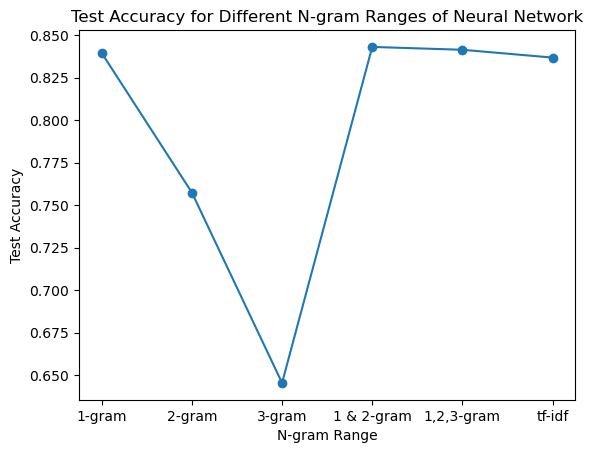

In [89]:
# Train models and evaluate test accuracy
test_accuracies = []
test_accuracies.append(test_accuracy1)
test_accuracies.append(test_accuracy2)
test_accuracies.append(test_accuracy3)
test_accuracies.append(test_accuracy4)
test_accuracies.append(test_accuracy5)
test_accuracies.append(test_accuracy6)
# Plot the results
plt.plot(range(1, 7), test_accuracies, marker='o')
plt.title('Test Accuracy for Different N-gram Ranges of Neural Network')
plt.xlabel('N-gram Range')
plt.ylabel('Test Accuracy')
plt.xticks(range(1, 7), ['1-gram', '2-gram', '3-gram', '1 & 2-gram', '1,2,3-gram', 'tf-idf'])
plt.show()